In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce

### Read Files ans Sheets

In [2]:
df_public_holiday = pd.read_excel('roster.xlsx',sheet_name='Public Holiday')

In [3]:
df_shift = pd.read_excel('roster.xlsx',sheet_name='Shift')

In [4]:
df_roster = pd.read_excel('roster.xlsx', sheet_name='52-week Roster', header=None) 

In [5]:
df_roster[0] = df_roster[0].fillna(method='ffill', axis=0)
df_roster[1] = df_roster[1].fillna(method='ffill', axis=0)

In [6]:
df_new_roster = df_roster.copy()

## Date Column

### Split by 'to' to get start and end date

In [7]:
df_new_roster[['A', 'B']] =  df_new_roster[0].str.split(' to ',1, expand=True)

In [8]:
df_new_roster.loc[df_new_roster['A'] == 'Dept: CDC2-Ward 86 Recovery', 'A'] = None

In [9]:
df_new_roster[['A', 'B']].head()

A                B
0  None             None
1  None             None
2  None             None
3     3  30 JANUARY 2022
4     3  30 JANUARY 2022

### Extract the day, month and year into single columns

In [10]:
df_new_roster[['A1', 'A2']] =  df_new_roster['A'].str.split(' ',1, expand=True)
df_new_roster[['B1', 'B2']] =  df_new_roster['B'].str.split(' ',1, expand=True)
df_new_roster[['B2', 'B3']] =  df_new_roster['B2'].str.split(' ',1, expand=True)

In [11]:
df_new_roster[['A1', 'A2', 'B1', 'B2', 'B3']].head()

A1    A2    B1       B2    B3
0  None  None  None     None  None
1  None  None  None     None  None
2  None  None  None     None  None
3     3  None    30  JANUARY  2022
4     3  None    30  JANUARY  2022

In [12]:
# List of the months 
month_list = ['JANUARY', 'FEBRUARY', 
              'MARCH', 'APRIL', 
              'MAY', 'JUNE',
              'JULY', 'AUGUST', 
              'SEPTEMBER', 'OCTOBER', 
              'NOVEMBER', 'DECEMBER']

In [13]:
# Replace month by a number 

current_month = 1

for month in month_list:
    df_new_roster['A2'] = df_new_roster['A2'].replace([month], current_month)
    df_new_roster['B2'] = df_new_roster['B2'].replace([month], current_month)
    
    current_month = current_month + 1

In [14]:
df_new_roster[['A1', 'A2', 'B1', 'B2', 'B3']].head()

A1  A2    B1   B2    B3
0  None NaN  None  NaN  None
1  None NaN  None  NaN  None
2  None NaN  None  NaN  None
3     3 NaN    30  1.0  2022
4     3 NaN    30  1.0  2022

### Extract the first and last date dataset
    Idear: Create the dates based on the first and last date on the dataset, works only if the roster covers every day

In [15]:
# Get the first date
start_day = int(df_new_roster['A1'][3])
start_month = int(df_new_roster['B2'][3])
start_year = int(df_new_roster['B3'][3])

start_date = f'{start_month}/{start_day}/{start_year}'
print(f'start date: {start_date}')

# Get the last date
end_day = int(df_new_roster['B1'][-1:])
end_month = int(df_new_roster['B2'][-1:])
end_year = int(df_new_roster['B3'][-1:])

end_date = f'{end_month}/{end_day}/{end_year}'
print(f'end date: {end_date}')

start date: 1/3/2022
end date: 1/1/2023


### Generate the time seriers based on start and end date

In [16]:
# Full time range  
date_range = pd.date_range(start=start_date,end=end_date)
date_range = date_range.strftime('%Y-%m-%d') # expected format YYYY-mm-dd

In [17]:
date_range

Index(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
       '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
       ...
       '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
       '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31', '2023-01-01'],
      dtype='object', length=364)

In [18]:
# The firtst 3 columns are placeholder
placeholder = ['Date', 'Date', 'Date']
placeholder.extend(date_range) # add the date range to the placeholder 

### Add the column to the roaster table and place as 2nd column

In [19]:
df_new_roster['date'] = placeholder
col = df_new_roster.pop("date")
df_new_roster.insert(1, col.name, col)

In [20]:
### Drop the heler columns 
df_new_roster = df_new_roster.drop(columns=['A', 'B', 'A1', 'A2', 'B1', 'B2', 'B3'])

In [21]:
df_new_roster.head()

0        date                         1      2  \
0  Dept: CDC2-Ward 86 Recovery        Date  Cost Center No: T2306186    S/N   
1  Dept: CDC2-Ward 86 Recovery        Date  Cost Center No: T2306186  Grade   
2  Dept: CDC2-Ward 86 Recovery        Date  Cost Center No: T2306186   Name   
3         3 to 30 JANUARY 2022  2022-01-03                       Mon      3   
4         3 to 30 JANUARY 2022  2022-01-04                       Tue      4   

                         3                  4                  5  \
0                        1                  2                  3   
1                     NC I               NC I               NC I   
2  Chrxstxnx Wxng Lxng Tzx  Lydxx Txng Wxx Lx  Lydxx Txng Wxx Lx   
3                     D07I               E129               E129   
4                     D07I                 DO               D079   

                         6                       7                  8  ...  \
0                        4                       5                  6  ...   
1                     NC I                   SSN I             SSN II  ...   
2  Wxng Lxng Tzx Chrxstxnx  Sxtx Hxjxr Bxntx xmrxn  Jxmxx Yxx Shx Mxn  ...   
3                     D08I                    D079               E129  ...   
4                     D07I                      PH               D078  ...   

                     40                         41                    42  \
0                    38                         39                    40   
1                   HCA                        HCA                   HCA   
2  Kxmxthy Thxrmxlxngxm  Yxshxnx Dxvx x/P Sxxgxrxn  Lxvxnxyx x/P Cxndrxn   
3                    RD                       E129                 N2012   
4                  E147                       E129                    PH   

                                 43                       44               45  \
0                                41                       42               43   
1                               HCA                      HCA              HCA   
2  Rxn Hxnx Fxtxnxh Bt Mxhd xmzxrxn  Shxmxlx x/P RxdxKrxsnxn  Vxrghxsx Blxssy   
3                              D079                     D079             D079   
4                              D079                     E129               DO   

                46                     47       48  \
0               44                     45       46   
1             SPSA                    PSA    SSN I   
2  Nxrjxnnxh Bxntx  Sxrxmxh Bxntx Sxlxmxd  Jxn Dxn   
3             D079                   E129        Z   
4               PH                     RD        Z   

                                  49  
0                                 47  
1                              SSN I  
2  Nxdxvxllx Dxthx Pxxthxmbxrxn Bxjx  
3                                  Z  
4                                  Z  

[5 rows x 51 columns]

## Replacement of all PH values with 'PH'

In [22]:
# Replace of the speacial cahracters
df_new_roster[list(range(2,50))] = df_new_roster[range(2,50)].replace('\?','', regex=True)
df_new_roster[list(range(2,50))] = df_new_roster[range(2,50)].replace('\!','', regex=True)
df_new_roster[list(range(2,50))] = df_new_roster[range(2,50)].replace('\)','', regex=True)
df_new_roster[list(range(2,50))] = df_new_roster[range(2,50)].replace(r"\n",'', regex=True)

In [23]:
# Replacement of all PH
# Using regex to detect the combination 'PH numbers/numbers' in any combination
df_new_roster[list(range(2,50))] = df_new_roster[list(range(2,50))].replace('PH [0-9]*\/[0-9]*','PH', regex=True)

In [24]:
df_new_roster.head()

0        date                         1      2  \
0  Dept: CDC2-Ward 86 Recovery        Date  Cost Center No: T2306186    S/N   
1  Dept: CDC2-Ward 86 Recovery        Date  Cost Center No: T2306186  Grade   
2  Dept: CDC2-Ward 86 Recovery        Date  Cost Center No: T2306186   Name   
3         3 to 30 JANUARY 2022  2022-01-03                       Mon      3   
4         3 to 30 JANUARY 2022  2022-01-04                       Tue      4   

                         3                  4                  5  \
0                        1                  2                  3   
1                     NC I               NC I               NC I   
2  Chrxstxnx Wxng Lxng Tzx  Lydxx Txng Wxx Lx  Lydxx Txng Wxx Lx   
3                     D07I               E129               E129   
4                     D07I                 DO               D079   

                         6                       7                  8  ...  \
0                        4                       5                  6  ...   
1                     NC I                   SSN I             SSN II  ...   
2  Wxng Lxng Tzx Chrxstxnx  Sxtx Hxjxr Bxntx xmrxn  Jxmxx Yxx Shx Mxn  ...   
3                     D08I                    D079               E129  ...   
4                     D07I                      PH               D078  ...   

                     40                         41                    42  \
0                    38                         39                    40   
1                   HCA                        HCA                   HCA   
2  Kxmxthy Thxrmxlxngxm  Yxshxnx Dxvx x/P Sxxgxrxn  Lxvxnxyx x/P Cxndrxn   
3                    RD                       E129                 N2012   
4                  E147                       E129                    PH   

                                 43                       44               45  \
0                                41                       42               43   
1                               HCA                      HCA              HCA   
2  Rxn Hxnx Fxtxnxh Bt Mxhd xmzxrxn  Shxmxlx x/P RxdxKrxsnxn  Vxrghxsx Blxssy   
3                              D079                     D079             D079   
4                              D079                     E129               DO   

                46                     47       48  \
0               44                     45       46   
1             SPSA                    PSA    SSN I   
2  Nxrjxnnxh Bxntx  Sxrxmxh Bxntx Sxlxmxd  Jxn Dxn   
3             D079                   E129        Z   
4               PH                     RD        Z   

                                  49  
0                                 47  
1                              SSN I  
2  Nxdxvxllx Dxthx Pxxthxmbxrxn Bxjx  
3                                  Z  
4                                  Z  

[5 rows x 51 columns]

## Highlight all columns wiht public holidays

In [25]:
df_public_holiday

Date
0 2022-01-04
1 2022-01-05
2 2022-01-06
3 2022-05-03
4 2022-08-01
5 2022-08-02
6 2022-12-25

In [26]:
# Get a list of all holiday dates
highlight_dates = list(df_public_holiday['Date'].astype('str'))

In [27]:
# Function to highlight public holidays 
def highlight_rows(df, column, dates):
    # Create an empty DataFrame with the same shape as the input DataFrame
    style_df = pd.DataFrame('', index=df.index, columns=df.columns)
    
    # Apply the style to rows that match any of the dates
    mask = df[column].isin(dates)
    style_df.loc[mask, :] = ' border: 1;border_color: silver; background-color: yellow;'
    
    return style_df

In [28]:
df_roster_final = df_new_roster.style.apply(highlight_rows, axis=None, column='date', dates=highlight_dates)

## Final style and write excel file

In [29]:
writer = pd.ExcelWriter('roster_new.xlsx', engine='xlsxwriter')

In [30]:
df_roster_final.to_excel(writer, sheet_name='52-week Roster',header=False,index=False)
df_shift.to_excel(writer, sheet_name='Shift', index=False)
df_public_holiday.to_excel(writer, sheet_name='Public Holiday', index=False)

In [31]:
workbook  = writer.book
worksheet = writer.sheets['52-week Roster']

In [32]:
# New format

merge_format = workbook.add_format(
    {
        "bold": 0,
        "border": 1,
        "border_color": "silver",
        "align": "center",
        "valign": "vcenter",
        "fg_color": "white",
    }
)

In [33]:
# Merge cells 

# Merge cells - loop to reduce code is possible
worksheet.merge_range("A1:A3", "Dept: CDC2-Ward 86 Recovery", merge_format)
worksheet.merge_range("B1:B3", "Date", merge_format)
worksheet.merge_range("C1:C3", "Cost Center No: T2306186", merge_format)

# Merge cells - loop to reduce code is possible
worksheet.merge_range("A4:A31", "3 to 30 JANUARY 2022", merge_format)
worksheet.merge_range("A32:A59", "31 JANUARY to 27 FEBRUARY 2022", merge_format)
worksheet.merge_range("A60:A87", "28 FEBRUARY to 27 MARCH 2022", merge_format)
worksheet.merge_range("A88:A115", "28 MARCH to 24 APRIL 2022", merge_format)
worksheet.merge_range("A116:A143", "25 APRIL to 22 MAY 2022", merge_format)
worksheet.merge_range("A144:A171", "23 MAY to 19 JUNE 2022", merge_format)
worksheet.merge_range("A172:A199", "20 JUNE to 17 JULY 2022", merge_format)
worksheet.merge_range("A200:A227", "18 JULY to 14 AUGUST 2022", merge_format)
worksheet.merge_range("A228:A255", "15 AUGUST to 11 SEPTEMBER 2022", merge_format)
worksheet.merge_range("A256:A283", "12 SEPTEMBER to 9 OCTOBER 2022", merge_format)
worksheet.merge_range("A284:A311", "10 OCTOBER to 6 NOVEMBER 2022", merge_format)
worksheet.merge_range("A312:A339", "7 NOVEMBER to 4 DECEMBER 2022", merge_format)
worksheet.merge_range("A340:A367", "5 DECEMBER to 1 JANUARY 2023", merge_format)

0

In [34]:
# Close the workbook
workbook.close()

## Data Analysis

### Converting and adding features to the shift table 

In [35]:
df_shift.head()

Shift Code         Shift Type  Start Time  End Time
0       D077  Working Day Shift       700.0    1400.0
1       D078  Working Day Shift       700.0    1500.0
2       D079  Working Day Shift       700.0    1600.0
3       D07I  Working Day Shift       700.0    1630.0
4       D089  Working Day Shift       800.0    1700.0

#### Add numeric label to the shift table 

In [36]:
df_shift_code_numeric = pd.DataFrame(columns=['Shift Type', 'shift_code_numeric'])

In [37]:
df_shift_code_numeric['Shift Type'] = df_shift['Shift Type'].unique()
df_shift_code_numeric['shift_code_numeric'] = [1,2,3,4,5,6,7] 

In [38]:
df_shift_code_numeric

Shift Type  shift_code_numeric
0             Working Day Shift                   1
1         Working Evening Shift                   2
2           Working Night Shift                   3
3         Non-working - Day Off                   4
4        Non-working - Rest Day                   5
5  Non-working - Public Holiday                   6
6                   Unavailable                   7

In [39]:
df_shift = df_shift.merge(df_shift_code_numeric, how='left', on='Shift Type')

In [40]:
# Example datetime series
df_shift['Start Time'] =  pd.to_datetime(df_shift['Start Time'], format='%H%M')
df_shift['End Time'] =  pd.to_datetime(df_shift['End Time'], format='%H%M')

In [41]:
df_shift.loc[df_shift['Shift Code'] == 'N2012', 'End Time'] = '1900-01-02 08:00:00'

In [370]:
df_shift.head()

Shift Code         Shift Type          Start Time            End Time  \
0       D077  Working Day Shift 1900-01-01 07:00:00 1900-01-01 14:00:00   
1       D078  Working Day Shift 1900-01-01 07:00:00 1900-01-01 15:00:00   
2       D079  Working Day Shift 1900-01-01 07:00:00 1900-01-01 16:00:00   
3       D07I  Working Day Shift 1900-01-01 07:00:00 1900-01-01 16:30:00   
4       D089  Working Day Shift 1900-01-01 08:00:00 1900-01-01 17:00:00   

   shift_code_numeric  Working Hours  
0                   1            7.0  
1                   1            8.0  
2                   1            9.0  
3                   1            9.5  
4                   1            9.0

In [43]:
# Calculate the time difference in hours between the two series
df_shift['Working Hours'] = np.abs((df_shift['End Time'] - df_shift['Start Time']).apply(lambda x: x.total_seconds() / 3600))

#### Creating new feature if staff or not 

In [371]:
df_shift.head()

Shift Code         Shift Type          Start Time            End Time  \
0       D077  Working Day Shift 1900-01-01 07:00:00 1900-01-01 14:00:00   
1       D078  Working Day Shift 1900-01-01 07:00:00 1900-01-01 15:00:00   
2       D079  Working Day Shift 1900-01-01 07:00:00 1900-01-01 16:00:00   
3       D07I  Working Day Shift 1900-01-01 07:00:00 1900-01-01 16:30:00   
4       D089  Working Day Shift 1900-01-01 08:00:00 1900-01-01 17:00:00   

   shift_code_numeric  Working Hours  
0                   1            7.0  
1                   1            8.0  
2                   1            9.0  
3                   1            9.5  
4                   1            9.0

### Cleaning and convertig formating the roaster table

In [45]:
# Drop columns
df_new_roster_analysis = df_new_roster.drop(columns=[0,1,2])

In [46]:
# Transpose the data frame 
df_analysis = df_new_roster_analysis.T.reset_index()

In [47]:
# Drop columns
df_analysis.drop(columns=['index', 0], inplace=True)

In [48]:
df_analysis.head()

1                        2           3           4           5    \
0  Date                     Date  2022-01-03  2022-01-04  2022-01-05   
1  NC I  Chrxstxnx Wxng Lxng Tzx        D07I        D07I          PH   
2  NC I        Lydxx Txng Wxx Lx        E129          DO        E129   
3  NC I        Lydxx Txng Wxx Lx        E129        D079        D079   
4  NC I  Wxng Lxng Tzx Chrxstxnx        D08I        D07I          PH   

          6           7           8           9           10   ...  \
0  2022-01-06  2022-01-07  2022-01-08  2022-01-09  2022-01-10  ...   
1          DO        D07I          DO        D08I        D07I  ...   
2        E129        E129        E129          RD        E129  ...   
3          DO          RD        E129        E129        E129  ...   
4        D07I        D089          RD          DO          RD  ...   

          357         358         359         360         361         362  \
0  2022-12-23  2022-12-24  2022-12-25  2022-12-26  2022-12-27  2022-12-28   
1        D089          DO          DO        D089          DO          RD   
2        D079        D079          RD          PH        D079        E129   
3          DO        D079        D079        D079          DO        E129   
4          DO          RD        D07I          PH          DO        D08I   

          363         364         365         366  
0  2022-12-29  2022-12-30  2022-12-31  2023-01-01  
1        D07I        D089        D08I          RD  
2        D079        D079          DO          RD  
3          RD        E129        E129          PH  
4        D07I        D08I          RD        D08I  

[5 rows x 366 columns]

In [49]:
df_analysis[1] = df_analysis[1].replace('Date','Grade', regex=True)
df_analysis[2] = df_analysis[2].replace('Date','Name', regex=True)

In [50]:
# Set head column 
new_header = df_analysis.iloc[0] #grab the first row for the header
df_analysis = df_analysis[1:] #take the data less the header row
df_analysis.columns = new_header #set the header row as the df header

In [51]:
df_analysis.head()

0  Grade                     Name 2022-01-03 2022-01-04 2022-01-05 2022-01-06  \
1   NC I  Chrxstxnx Wxng Lxng Tzx       D07I       D07I         PH         DO   
2   NC I        Lydxx Txng Wxx Lx       E129         DO       E129       E129   
3   NC I        Lydxx Txng Wxx Lx       E129       D079       D079         DO   
4   NC I  Wxng Lxng Tzx Chrxstxnx       D08I       D07I         PH       D07I   
5  SSN I   Sxtx Hxjxr Bxntx xmrxn       D079         PH         RD         DO   

0 2022-01-07 2022-01-08 2022-01-09 2022-01-10  ... 2022-12-23 2022-12-24  \
1       D07I         DO       D08I       D07I  ...       D089         DO   
2       E129       E129         RD       E129  ...       D079       D079   
3         RD       E129       E129       E129  ...         DO       D079   
4       D089         RD         DO         RD  ...         DO         RD   
5       E129       D079       D079       E129  ...      N2012         DO   

0 2022-12-25 2022-12-26 2022-12-27 2022-12-28 2022-12-29 2022-12-30  \
1         DO       D089         DO         RD       D07I       D089   
2         RD         PH       D079       E129       D079       D079   
3       D079       D079         DO       E129         RD       E129   
4       D07I         PH         DO       D08I       D07I       D08I   
5         RD         RD       D077         DO       E129       D077   

0 2022-12-31 2023-01-01  
1       D08I         RD  
2         DO         RD  
3       E129         PH  
4         RD       D08I  
5       D079       D079  

[5 rows x 366 columns]

In [52]:
# Add a number duplicated names
# A name is twice in the list: Lydxx Txng Wxx Lx

dup_mask = df_analysis.duplicated(subset='Name', keep=False)
df_analysis.loc[dup_mask, 'Name'] = df_analysis[dup_mask].groupby('Name').cumcount().add(1).astype(str).radd(df_analysis.loc[dup_mask, 'Name'])

In [53]:
df_analysis.head()

0  Grade                     Name 2022-01-03 2022-01-04 2022-01-05 2022-01-06  \
1   NC I  Chrxstxnx Wxng Lxng Tzx       D07I       D07I         PH         DO   
2   NC I       Lydxx Txng Wxx Lx1       E129         DO       E129       E129   
3   NC I       Lydxx Txng Wxx Lx2       E129       D079       D079         DO   
4   NC I  Wxng Lxng Tzx Chrxstxnx       D08I       D07I         PH       D07I   
5  SSN I   Sxtx Hxjxr Bxntx xmrxn       D079         PH         RD         DO   

0 2022-01-07 2022-01-08 2022-01-09 2022-01-10  ... 2022-12-23 2022-12-24  \
1       D07I         DO       D08I       D07I  ...       D089         DO   
2       E129       E129         RD       E129  ...       D079       D079   
3         RD       E129       E129       E129  ...         DO       D079   
4       D089         RD         DO         RD  ...         DO         RD   
5       E129       D079       D079       E129  ...      N2012         DO   

0 2022-12-25 2022-12-26 2022-12-27 2022-12-28 2022-12-29 2022-12-30  \
1         DO       D089         DO         RD       D07I       D089   
2         RD         PH       D079       E129       D079       D079   
3       D079       D079         DO       E129         RD       E129   
4       D07I         PH         DO       D08I       D07I       D08I   
5         RD         RD       D077         DO       E129       D077   

0 2022-12-31 2023-01-01  
1       D08I         RD  
2         DO         RD  
3       E129         PH  
4         RD       D08I  
5       D079       D079  

[5 rows x 366 columns]

In [54]:
# Melt on the dataframe to shape it in the right format 
df_analysis_melt = pd.melt(df_analysis, id_vars=['Grade', 'Name'])

In [55]:
df_analysis_melt.head()

Grade                     Name           0 value
0   NC I  Chrxstxnx Wxng Lxng Tzx  2022-01-03  D07I
1   NC I       Lydxx Txng Wxx Lx1  2022-01-03  E129
2   NC I       Lydxx Txng Wxx Lx2  2022-01-03  E129
3   NC I  Wxng Lxng Tzx Chrxstxnx  2022-01-03  D08I
4  SSN I   Sxtx Hxjxr Bxntx xmrxn  2022-01-03  D079

In [56]:
# Rename columns
df_analysis_melt = df_analysis_melt.rename({0: 'Date','value': 'Shift Code'}, axis=1)

# Set date field to datetime
df_analysis_melt['Date'] = pd.to_datetime(df_analysis_melt['Date'])

In [57]:
# Join shift code to the data frame
df_analysis_melt = df_analysis_melt.merge(df_shift, how='left', on='Shift Code')

In [58]:
df_analysis_melt.head()

Grade                     Name       Date Shift Code  \
0   NC I  Chrxstxnx Wxng Lxng Tzx 2022-01-03       D07I   
1   NC I       Lydxx Txng Wxx Lx1 2022-01-03       E129   
2   NC I       Lydxx Txng Wxx Lx2 2022-01-03       E129   
3   NC I  Wxng Lxng Tzx Chrxstxnx 2022-01-03       D08I   
4  SSN I   Sxtx Hxjxr Bxntx xmrxn 2022-01-03       D079   

              Shift Type          Start Time            End Time  \
0      Working Day Shift 1900-01-01 07:00:00 1900-01-01 16:30:00   
1  Working Evening Shift 1900-01-01 12:00:00 1900-01-01 21:00:00   
2  Working Evening Shift 1900-01-01 12:00:00 1900-01-01 21:00:00   
3      Working Day Shift 1900-01-01 08:00:00 1900-01-01 17:30:00   
4      Working Day Shift 1900-01-01 07:00:00 1900-01-01 16:00:00   

   shift_code_numeric  Working Hours  
0                 1.0            9.5  
1                 2.0            9.0  
2                 2.0            9.0  
3                 1.0            9.5  
4                 1.0            9.0

### Check consitency of the shift mapping

In [59]:
df_analysis_melt[df_analysis_melt['Shift Type'].isna()]['Shift Code'].value_counts()

PH      90
D0F9     5
AL+      2
Name: Shift Code, dtype: int64

In [60]:
#Drop not mapped rows 

df_analysis_melt = df_analysis_melt[~(df_analysis_melt['Shift Code'] == 'D0F9')]
df_analysis_melt = df_analysis_melt[~(df_analysis_melt['Shift Code'] == 'AL+')]

In [61]:
df_analysis_melt['Grade'].value_counts()

SN I      4368
SN II     4368
HCA       3640
NC I      1449
SSN I     1092
SSN II    1092
AN I.      364
SPSA       364
PSA        364
Name: Grade, dtype: int64

In [62]:
# Create features if employe is staff

staff_list = ['SSN I', 'SSN II', 'SN I', 'SN II', 'AN I.', 'HCA']

In [63]:
# Add 1 to staff and 0 for not straff
df_analysis_melt['Staff'] = 0
df_analysis_melt.loc[df_analysis_melt['Grade'].isin(staff_list),'Staff'] = 1

In [64]:
df_analysis_melt[['Grade','Staff']].value_counts()

Grade   Staff
SN I    1        4368
SN II   1        4368
HCA     1        3640
NC I    0        1449
SSN I   1        1092
SSN II  1        1092
AN I.   1         364
PSA     0         364
SPSA    0         364
dtype: int64

In [65]:
# Create features from the date 

df_analysis_melt['DayOfWeek'] =df_analysis_melt['Date'].dt.dayofweek
df_analysis_melt['Day'] = df_analysis_melt['Date'].dt.day
df_analysis_melt['Month'] = df_analysis_melt['Date'].dt.month
df_analysis_melt['Week'] = df_analysis_melt['Date'].dt.week

In [66]:
df_analysis_melt = df_analysis_melt[['Date','DayOfWeek','Week','Month','Day', 'Name','Grade','Shift Code', 'Shift Type', 'Start Time','End Time' ,'Working Hours','Staff','shift_code_numeric']]

In [67]:
df_analysis_melt.head()

Date  DayOfWeek  Week  Month  Day                     Name  Grade  \
0 2022-01-03          0     1      1    3  Chrxstxnx Wxng Lxng Tzx   NC I   
1 2022-01-03          0     1      1    3       Lydxx Txng Wxx Lx1   NC I   
2 2022-01-03          0     1      1    3       Lydxx Txng Wxx Lx2   NC I   
3 2022-01-03          0     1      1    3  Wxng Lxng Tzx Chrxstxnx   NC I   
4 2022-01-03          0     1      1    3   Sxtx Hxjxr Bxntx xmrxn  SSN I   

  Shift Code             Shift Type          Start Time            End Time  \
0       D07I      Working Day Shift 1900-01-01 07:00:00 1900-01-01 16:30:00   
1       E129  Working Evening Shift 1900-01-01 12:00:00 1900-01-01 21:00:00   
2       E129  Working Evening Shift 1900-01-01 12:00:00 1900-01-01 21:00:00   
3       D08I      Working Day Shift 1900-01-01 08:00:00 1900-01-01 17:30:00   
4       D079      Working Day Shift 1900-01-01 07:00:00 1900-01-01 16:00:00   

   Working Hours  Staff  shift_code_numeric  
0            9.5      0                 1.0  
1            9.0      0                 2.0  
2            9.0      0                 2.0  
3            9.5      0                 1.0  
4            9.0      1                 1.0

### Number of grades 

In [68]:
df_grades = df_analysis_melt[['Name', 'Grade']]

In [69]:
df_grades.drop_duplicates()['Grade'].value_counts()

SN I      12
SN II     12
HCA       10
NC I       4
SSN I      3
SSN II     3
AN I.      1
SPSA       1
PSA        1
Name: Grade, dtype: int64

### Group by Week, Grade and Shift Code and count by Schift Code
    The groupby is to check if Staffs, who are SSN I or SSNII or SN I or SN II, receive 1 RD and 1 DO per week

In [70]:
my_resut = df_analysis_melt.groupby(['Name','Week','Grade','Shift Code'],as_index=False)['Shift Code'].value_counts().reset_index(drop=True)

In [71]:
my_resut_RD = my_resut[my_resut['Shift Code'].isin(['RD'])]
my_resut_DO = my_resut[my_resut['Shift Code'].isin(['DO'])]

In [72]:
sns.lineplot(data=my_resut_RD, x="Week", y="count", hue="Grade")

<AxesSubplot:xlabel='Week', ylabel='count'>

<AxesSubplot:xlabel='Week', ylabel='count'>

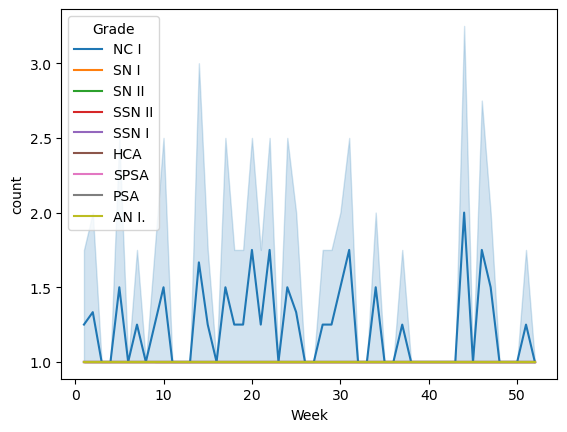

In [73]:
sns.lineplot(data=my_resut_DO, x="Week", y="count", hue="Grade")

<AxesSubplot:xlabel='Week', ylabel='count'>

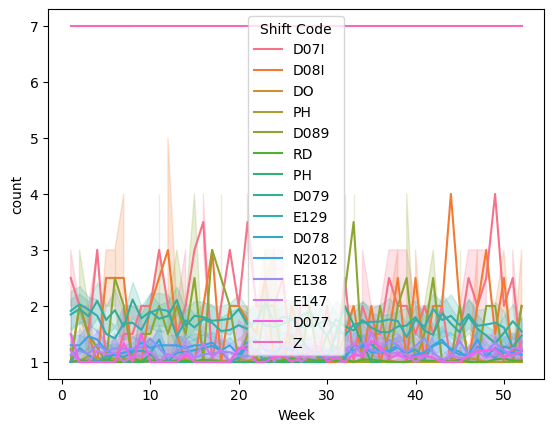

In [74]:
sns.lineplot(data=my_resut, x="Week", y="count", hue="Shift Code")

### People not available (Z)

In [75]:
shift_z = my_resut[my_resut['Shift Code'] == 'Z']

<AxesSubplot:xlabel='Week', ylabel='count'>

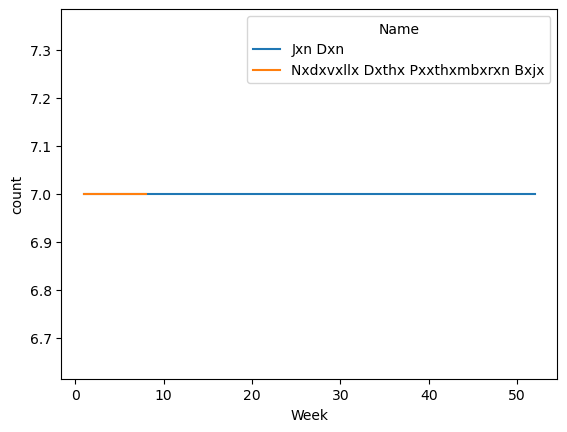

In [76]:
sns.lineplot(data=shift_z, x="Week", y="count", hue="Name")

#### Check SN I and RDs

In [77]:
SN_I_and_RD = my_resut[(my_resut['Grade'] == 'SN I') & (my_resut['Shift Code'] == 'RD')]

<AxesSubplot:xlabel='Week', ylabel='count'>

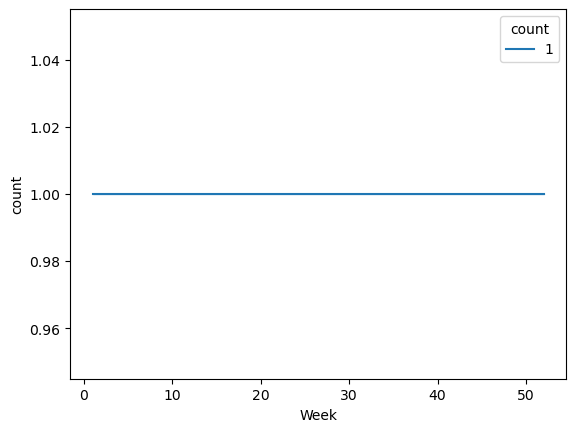

In [78]:
sns.lineplot(data=SN_I_and_RD, x="Week", y="count", hue="count")

In [79]:
SN_I_and_RD[~(SN_I_and_RD['count']) == 12]

Empty DataFrame
Columns: [Name, Week, Grade, Shift Code, count]
Index: []

Result: Hypothesis is true SN I gets every week 1 RD 

#### Check SN I and DOs

In [80]:
SN_I_and_DO = my_resut[(my_resut['Grade'] == 'SN I') & (my_resut['Shift Code'] == 'DO')]

<AxesSubplot:xlabel='Week', ylabel='count'>

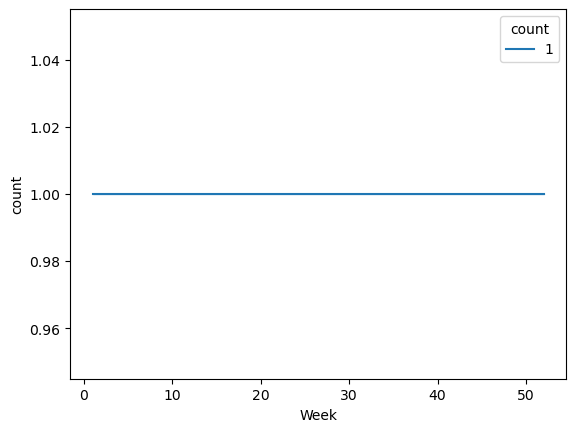

In [81]:
sns.lineplot(data=SN_I_and_DO, x="Week", y="count", hue="count")

In [82]:
SN_I_and_DO[~(SN_I_and_DO['count']) == 12]

Empty DataFrame
Columns: [Name, Week, Grade, Shift Code, count]
Index: []

Result: Hypothesis is true SN I gets every week 1 DO 

#### Check SN II and RDs

In [83]:
SN_II_and_RD = my_resut[(my_resut['Grade'] == 'SN II') & (my_resut['Shift Code'] == 'RD')]

<AxesSubplot:xlabel='Week', ylabel='count'>

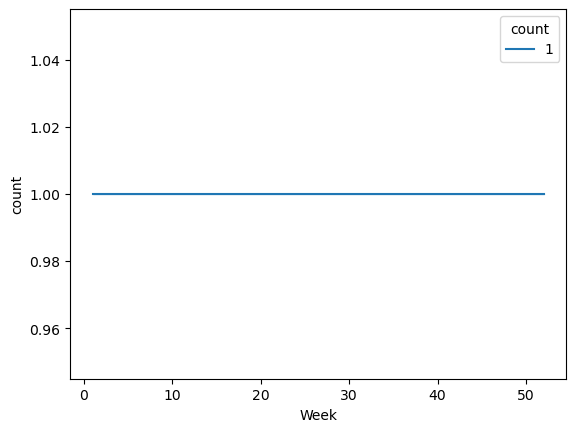

In [84]:
sns.lineplot(data=SN_II_and_RD, x="Week", y="count", hue="count")

In [85]:
SN_II_and_RD[~(SN_II_and_RD['count']) == 12]

Empty DataFrame
Columns: [Name, Week, Grade, Shift Code, count]
Index: []

Result: Hypothesis is true SN II gets every week 1 RD 

#### Check SN II and DOs

In [86]:
SN_II_and_DO = my_resut[(my_resut['Grade'] == 'SN II') & (my_resut['Shift Code'] == 'DO')]

<AxesSubplot:xlabel='Week', ylabel='count'>

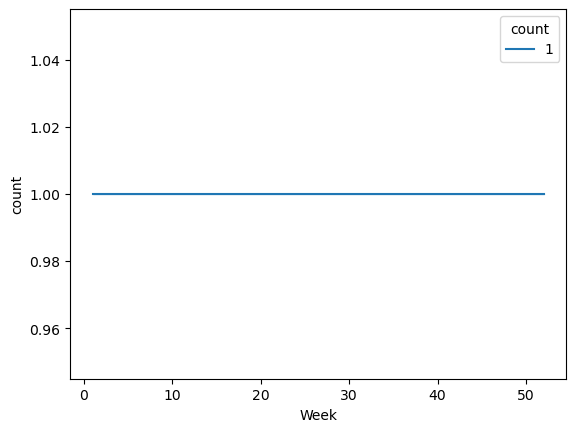

In [87]:
sns.lineplot(data=SN_II_and_DO, x="Week", y="count", hue="count")

In [88]:
SN_II_and_DO[~(SN_II_and_DO['count']) == 12]

Empty DataFrame
Columns: [Name, Week, Grade, Shift Code, count]
Index: []

Result: Hypothesis is true SN II gets every week 1 DO 

#### Check SSN I and RDs

In [89]:
SSN_I_and_RD = my_resut[(my_resut['Grade'] == 'SSN I') & (my_resut['Shift Code'] == 'RD')]

<AxesSubplot:xlabel='Week', ylabel='count'>

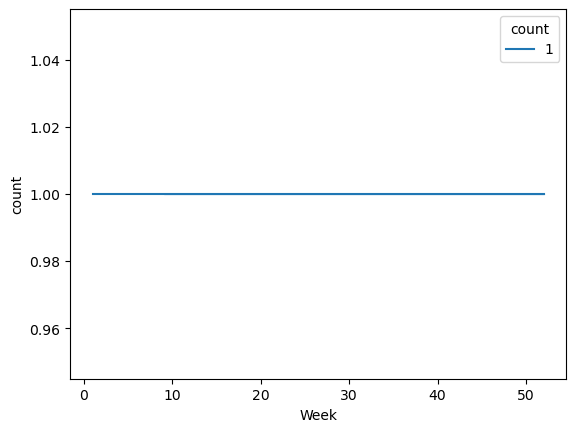

In [90]:
sns.lineplot(data=SSN_I_and_RD, x="Week", y="count", hue="count")

In [91]:
SSN_I_and_RD[~(SSN_I_and_RD['count'] == 3)].head()

Name  Week  Grade Shift Code  count
1720                            Jxn Dxn     9  SSN I         RD      1
1726                            Jxn Dxn    10  SSN I         RD      1
1731                            Jxn Dxn    11  SSN I         RD      1
1736                            Jxn Dxn    12  SSN I         RD      1
5734  Nxdxvxllx Dxthx Pxxthxmbxrxn Bxjx     9  SSN I         RD      1

Result: Hypothesis is false SNN I gets every week 1 RD

#### Check SSN I and DOs

In [92]:
SSN_I_and_DO = my_resut[(my_resut['Grade'] == 'SSN I') & (my_resut['Shift Code'] == 'DO')]

<AxesSubplot:xlabel='Week', ylabel='count'>

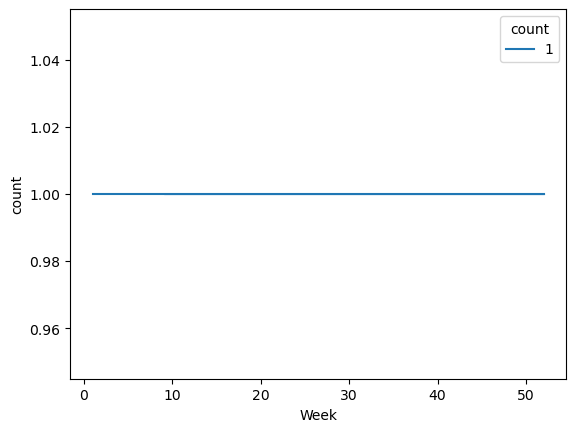

In [93]:
sns.lineplot(data=SSN_I_and_DO, x="Week", y="count", hue="count")

In [94]:
SSN_I_and_DO[~(SSN_I_and_DO['count'] == 3)].head()

Name  Week  Grade Shift Code  count
1716                            Jxn Dxn     9  SSN I         DO      1
1721                            Jxn Dxn    10  SSN I         DO      1
1728                            Jxn Dxn    11  SSN I         DO      1
1732                            Jxn Dxn    12  SSN I         DO      1
5730  Nxdxvxllx Dxthx Pxxthxmbxrxn Bxjx     9  SSN I         DO      1

Result: Hypothesis is true every SNN I gets every week 1 DO

#### Check SSN II and RDs

In [95]:
SSN_II_and_RD = my_resut[(my_resut['Grade'] == 'SSN II') & (my_resut['Shift Code'] == 'RD')]

<AxesSubplot:xlabel='Week', ylabel='count'>

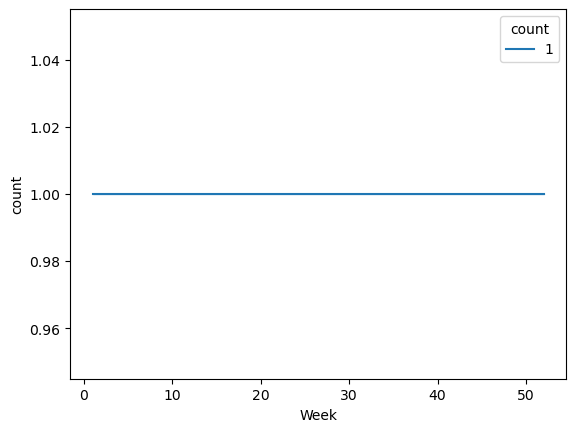

In [96]:
sns.lineplot(data=SSN_II_and_RD, x="Week", y="count", hue="count")

In [97]:
SSN_II_and_RD

Name  Week   Grade Shift Code  count
1415   Jxmxx Yxx Shx Mxn     1  SSN II         RD      1
1422   Jxmxx Yxx Shx Mxn     2  SSN II         RD      1
1426   Jxmxx Yxx Shx Mxn     3  SSN II         RD      1
1431   Jxmxx Yxx Shx Mxn     4  SSN II         RD      1
1436   Jxmxx Yxx Shx Mxn     5  SSN II         RD      1
...                  ...   ...     ...        ...    ...
10831        Txx Pxxshxn    48  SSN II         RD      1
10838        Txx Pxxshxn    49  SSN II         RD      1
10843        Txx Pxxshxn    50  SSN II         RD      1
10849        Txx Pxxshxn    51  SSN II         RD      1
10855        Txx Pxxshxn    52  SSN II         RD      1

[156 rows x 5 columns]

In [98]:
SSN_II_and_RD[~(SSN_II_and_RD['count'] == 3)].head()

Name  Week   Grade Shift Code  count
1415  Jxmxx Yxx Shx Mxn     1  SSN II         RD      1
1422  Jxmxx Yxx Shx Mxn     2  SSN II         RD      1
1426  Jxmxx Yxx Shx Mxn     3  SSN II         RD      1
1431  Jxmxx Yxx Shx Mxn     4  SSN II         RD      1
1436  Jxmxx Yxx Shx Mxn     5  SSN II         RD      1

Result: Hypothesis is true every SNN II gets every week 1 RD

#### Check SSN I and DOs

In [99]:
SSN_I_and_DO = my_resut[(my_resut['Grade'] == 'SSN I') & (my_resut['Shift Code'] == 'DO')]

<AxesSubplot:xlabel='Week', ylabel='count'>

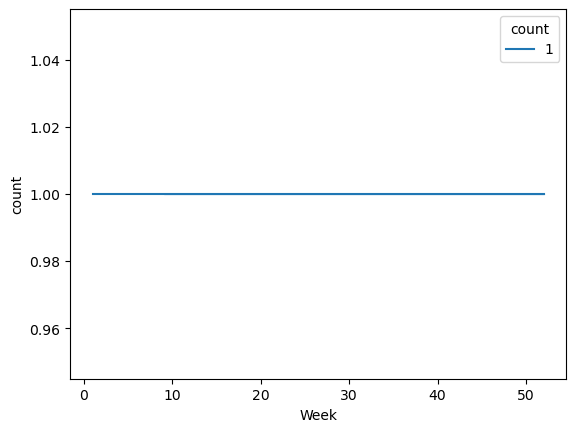

In [100]:
sns.lineplot(data=SSN_I_and_DO, x="Week", y="count", hue="count")

In [101]:
SSN_I_and_DO[~(SSN_I_and_DO['count'] == 3)].head()

Name  Week  Grade Shift Code  count
1716                            Jxn Dxn     9  SSN I         DO      1
1721                            Jxn Dxn    10  SSN I         DO      1
1728                            Jxn Dxn    11  SSN I         DO      1
1732                            Jxn Dxn    12  SSN I         DO      1
5730  Nxdxvxllx Dxthx Pxxthxmbxrxn Bxjx     9  SSN I         DO      1

## Check Pattern

#### Filter only staff

In [268]:
df_pattern = df_analysis_melt[df_analysis_melt['Staff'] == 1]

In [269]:
df_pattern.head()

Date  DayOfWeek  Week  Month  Day                            Name  \
4 2022-01-03          0     1      1    3          Sxtx Hxjxr Bxntx xmrxn   
5 2022-01-03          0     1      1    3               Jxmxx Yxx Shx Mxn   
6 2022-01-03          0     1      1    3  Nxr Fxtxn Bxn Mxhxmxd xdbxllxh   
7 2022-01-03          0     1      1    3                     Txx Pxxshxn   
8 2022-01-03          0     1      1    3           Dxnxxl Chxx Gxxng Hxx   

    Grade Shift Code             Shift Type          Start Time  \
4   SSN I       D079      Working Day Shift 1900-01-01 07:00:00   
5  SSN II       E129  Working Evening Shift 1900-01-01 12:00:00   
6  SSN II       E129  Working Evening Shift 1900-01-01 12:00:00   
7  SSN II      N2012    Working Night Shift 1900-01-01 20:00:00   
8    SN I      N2012    Working Night Shift 1900-01-01 20:00:00   

             End Time  Working Hours  Staff  shift_code_numeric  
4 1900-01-01 16:00:00            9.0      1                 1.0  
5 1900-01-01 21:00:00            9.0      1                 2.0  
6 1900-01-01 21:00:00            9.0      1                 2.0  
7 1900-01-02 08:00:00           12.0      1                 3.0  
8 1900-01-02 08:00:00           12.0      1                 3.0

#### Group Data

In [270]:
df_pattern = df_pattern.groupby(['Date','Name','Shift Type'],as_index=False)['Shift Type'].value_counts().reset_index(drop=True)

#### Create a new column to simplify the shift type 

In [271]:
df_pattern['Shift Type Optimized'] = df_pattern['Shift Type']
df_pattern.loc[df_pattern['Shift Type'].isin(['Working Night Shift']), 'Shift Type Optimized'] = 'Night Shift'
df_pattern.loc[df_pattern['Shift Type'].isin(['Working Evening Shift']), 'Shift Type Optimized'] = 'Evening Shift'
df_pattern.loc[df_pattern['Shift Type'].isin(['Working Day Shift']), 'Shift Type Optimized'] = 'Day Shift'
df_pattern.loc[df_pattern['Shift Type'].isin(['Non-working - Public Holiday']), 'Shift Type Optimized'] = 'Public Holiday'
df_pattern.loc[df_pattern['Shift Type'].isin(['Non-working - Day Off', 'Non-working - Rest Day']), 'Shift Type Optimized'] = 'Day Off' # Day Off and Rest Day to Day Off
df_pattern.drop(columns=['count'], inplace=True)

In [272]:
df_pattern.head()

Date                   Name             Shift Type  \
0 2022-01-03          Chxn Pxx Kxxn  Working Evening Shift   
1 2022-01-03  Dxnxxl Chxx Gxxng Hxx    Working Night Shift   
2 2022-01-03  Gxxlvxxnn xzx Rxsxlxn  Working Evening Shift   
3 2022-01-03  Gxyxthxrx Kxthxrvxlxx  Non-working - Day Off   
4 2022-01-03      Jxmxx Yxx Shx Mxn  Working Evening Shift   

  Shift Type Optimized  
0        Evening Shift  
1          Night Shift  
2        Evening Shift  
3              Day Off  
4        Evening Shift

### Find working pattern by shifting 

In [273]:
pd.set_option('display.max_colwidth', None)

In [282]:
# Function to shift by names the shifts to find pattern
# The windows allowes to select how many days should compared
def find_shift_patterns(df,column_name, window_size=2):
    # create a new column with the shift types for the next window_size days
    
    df = df.copy()
    
    df.sort_values(by=['Name', 'Date'], inplace=True)
    
    for i in range(1, window_size):
        df[f'Next {column_name}{i}'] = df.groupby('Name')[column_name].shift(-i).astype(str)

    # drop the last rows, which have NaN values for 'Next Shift Type'
    df = df[:-window_size+1]

    # create a new column that combines the shift types for the current and next window_size days
    shift_sequence_cols = [column_name] + [f'Next {column_name}{i}' for i in range(1, window_size)]
    df['Shift Sequence'] = df[shift_sequence_cols].apply(lambda x: ' -> '.join(x), axis=1)

    # count the occurrences of each shift sequence
    shift_counts = df['Shift Sequence'].value_counts().reset_index(name='Count')
    shift_counts.rename(columns={'index': f'Pattern {column_name} {window_size} Days' }, inplace=True)

    return shift_counts

#### Column Shift Type - Compare 2 Days

In [283]:
shift_counts = find_shift_patterns(df_pattern,'Shift Type', window_size=2)
shift_counts.head(10)

Pattern Shift Type 2 Days  Count
0       Working Evening Shift -> Working Day Shift   1499
1           Working Day Shift -> Working Day Shift   1322
2       Working Day Shift -> Working Evening Shift   1248
3   Working Evening Shift -> Working Evening Shift   1226
4  Non-working - Rest Day -> Working Evening Shift    846
5   Non-working - Day Off -> Working Evening Shift    795
6     Working Night Shift -> Non-working - Day Off    683
7    Working Night Shift -> Non-working - Rest Day    633
8         Working Day Shift -> Working Night Shift    611
9      Non-working - Rest Day -> Working Day Shift    602

Selected Pattern 2 Days:
- Working Evening Shift -> Working Day Shift # Rank 1
- Working Day Shift ->  Working Day Shift # Rank 2
- Working Night Shift -> Non-working - Day Off # Rank 5
- Working Night Shift -> Non-working - Rest Day # Rank 6

#### Column Shift Type - Compare 3 Days

In [284]:
shift_counts = find_shift_patterns(df_pattern,'Shift Type', window_size=3)
shift_counts.head(10)

Pattern Shift Type 3 Days  Count
0       Working Evening Shift -> Working Day Shift -> Working Day Shift    465
1   Working Evening Shift -> Working Evening Shift -> Working Day Shift    418
2   Working Evening Shift -> Working Day Shift -> Working Evening Shift    402
3                             Unavailable -> Unavailable -> Unavailable    386
4       Working Day Shift -> Working Day Shift -> Working Evening Shift    386
5  Non-working - Rest Day -> Working Evening Shift -> Working Day Shift    373
6           Working Day Shift -> Working Day Shift -> Working Day Shift    359
7   Working Day Shift -> Working Evening Shift -> Working Evening Shift    350
8       Working Day Shift -> Working Evening Shift -> Working Day Shift    346
9   Non-working - Day Off -> Working Evening Shift -> Working Day Shift    332

Selected Pattern 3 Days:
- Working Evening Shift -> Working Day Shift -> Working Day Shift	 # Rank 1
- Working Evening Shift -> Working Evening Shift -> Working Day Shift # Rank 2 

#### Column Shift Type - Compare 4 Days

In [286]:
shift_counts = find_shift_patterns(df_pattern,'Shift Type', window_size=4)
shift_counts.head(10)

Pattern Shift Type 4 Days  \
0                                         Unavailable -> Unavailable -> Unavailable -> Unavailable   
1  Working Night Shift -> Non-working - Day Off -> Non-working - Rest Day -> Working Evening Shift   
2    Working Night Shift -> Working Night Shift -> Non-working - Day Off -> Non-working - Rest Day   
3        Non-working - Rest Day -> Working Evening Shift -> Working Day Shift -> Working Day Shift   
4  Working Night Shift -> Non-working - Rest Day -> Non-working - Day Off -> Working Evening Shift   
5    Non-working - Day Off -> Non-working - Rest Day -> Working Evening Shift -> Working Day Shift   
6    Working Night Shift -> Working Night Shift -> Non-working - Rest Day -> Non-working - Day Off   
7         Working Evening Shift -> Working Day Shift -> Working Day Shift -> Working Evening Shift   
8     Non-working - Day Off -> Working Evening Shift -> Working Day Shift -> Working Evening Shift   
9    Non-working - Rest Day -> Working Evening Shift -> Working Day Shift -> Working Evening Shift   

   Count  
0    383  
1    159  
2    138  
3    136  
4    133  
5    131  
6    129  
7    126  
8    121  
9    119

Selected Pattern 4 Days:
- Working Night Shift -> Non-working - Day Off -> Non-working - Rest Day -> Working Evening Shift	 # Rank 2
- Working Night Shift -> Working Night Shift -> Non-working - Day Off -> Non-working - Rest Day # Rank 3
- Working Night Shift -> Non-working - Rest Day -> Non-working - Day Off -> Working Evening Shift #	Rank 5
- Working Night Shift -> Working Night Shift -> Non-working - Rest Day -> Non-working - Day Off # Rank7

#### Column Shift Type Optimized - Compare 2 Days

In [287]:
shift_counts = find_shift_patterns(df_pattern,'Shift Type Optimized', window_size=2)
shift_counts.head(10)

Pattern Shift Type Optimized 2 Days  Count
0            Day Off -> Evening Shift   1641
1          Evening Shift -> Day Shift   1499
2              Day Shift -> Day Shift   1322
3              Night Shift -> Day Off   1316
4          Day Shift -> Evening Shift   1248
5      Evening Shift -> Evening Shift   1226
6                Day Off -> Day Shift   1183
7                  Day Off -> Day Off    994
8            Evening Shift -> Day Off    903
9                Day Shift -> Day Off    858

Selected Pattern 2 Days:
- Day Off -> Evening Shift # Rank 1
- Evening Shift -> Day Shift # Rank 2
- Day Shift -> Day Shift #	Rank 3
- Night Shift -> Day Off	 # Rank 4

#### Column Shift Type Optimized - Compare 3 Days

In [288]:
shift_counts = find_shift_patterns(df_pattern,'Shift Type Optimized', window_size=3)
shift_counts.head(10)

Pattern Shift Type Optimized 3 Days  Count
0        Day Off -> Evening Shift -> Day Shift    705
1            Night Shift -> Day Off -> Day Off    564
2    Day Off -> Evening Shift -> Evening Shift    561
3          Day Off -> Day Off -> Evening Shift    531
4            Day Off -> Day Shift -> Day Shift    478
5      Evening Shift -> Day Shift -> Day Shift    465
6        Day Off -> Day Shift -> Evening Shift    440
7      Night Shift -> Day Off -> Evening Shift    435
8          Day Shift -> Night Shift -> Day Off    418
9  Evening Shift -> Evening Shift -> Day Shift    418

Selected Pattern 3 Days:
- Day Off -> Evening Shift -> Day Shift	 # Rank 1
- Night Shift -> Day Off -> Day Off	 # Rank 2
- Day Off -> Evening Shift -> Evening Shift #	Rank 3

#### Column Shift Type Optimized - Compare 4 Days

In [289]:
shift_counts = find_shift_patterns(df_pattern,'Shift Type Optimized', window_size=4)
shift_counts.head(10)

Pattern Shift Type Optimized 4 Days  Count
0  Unavailable -> Unavailable -> Unavailable -> Unavailable    383
1        Night Shift -> Day Off -> Day Off -> Evening Shift    320
2          Night Shift -> Night Shift -> Day Off -> Day Off    293
3          Day Off -> Day Off -> Evening Shift -> Day Shift    259
4        Day Off -> Evening Shift -> Day Shift -> Day Shift    246
5    Day Off -> Evening Shift -> Day Shift -> Evening Shift    240
6    Day Off -> Evening Shift -> Evening Shift -> Day Shift    226
7            Night Shift -> Day Off -> Day Off -> Day Shift    212
8      Day Off -> Day Off -> Evening Shift -> Evening Shift    195
9      Night Shift -> Day Off -> Evening Shift -> Day Shift    192

Selected Pattern 3 Days:
- Night Shift -> Day Off -> Day Off -> Evening Shift # Rank 1
- Night Shift -> Night Shift -> Day Off -> Day Off # Rank 2
- Day Off -> Day Off -> Evening Shift -> Day Shift # Rank 3

### Find working pattern 2 weeks

In [298]:
import pandas as pd

def find_matching_patterns(df, shift_col='Shift Type', last_shift_day=14):
    # create new columns with the shift types for the previous day, last_shift_day, and last_shift_day + 1
    df[f'{shift_col} -1'] = df.groupby('Name')[shift_col].shift(1).astype(str)
    df[f'{shift_col} -{last_shift_day}'] = df.groupby('Name')[shift_col].shift(last_shift_day).astype(str)
    df[f'{shift_col} -{last_shift_day+1}'] = df.groupby('Name')[shift_col].shift(last_shift_day+1).astype(str)

    # drop the first row, which has NaN values for the previous day shift type
    df = df.dropna(subset=[f'{shift_col} -1'])

    # create a new column that indicates whether the current shift type matches the shift type from last_shift_day and last_shift_day+1
    df['Match'] = (df[shift_col] == df[f'{shift_col} -{last_shift_day}']) & (df[shift_col] == df[f'{shift_col} -{last_shift_day+1}'])

    # filter to keep only rows where there is a match
    matching_patterns = df[df['Match']]

    # return the explicit matching pattern for each row
    matching_patterns['Matching Pattern'] = matching_patterns[[shift_col, f'{shift_col} -{last_shift_day}']].apply(lambda x: ' -> '.join(x), axis=1)

    return matching_patterns[['Name', 'Date', shift_col, f'{shift_col} -{last_shift_day}', 'Matching Pattern']]

#### Column Shift Type - Compare 2 Weeks 

In [361]:
matching_patterns = find_matching_patterns(df_pattern, shift_col='Shift Type', last_shift_day=14)
pattern_counts = matching_patterns['Matching Pattern'].value_counts().reset_index(name='Count')
pattern_counts.rename(columns={'index': 'Matching Pattern'}, inplace=True)
pattern_counts.head()

Matching Pattern  Count
0  Working Evening Shift -> Working Evening Shift    364
1          Working Day Shift -> Working Day Shift    363
2                      Unavailable -> Unavailable    347
3      Working Night Shift -> Working Night Shift     44
4  Non-working - Day Off -> Non-working - Day Off      6

Selected Pattern 2 Weeks:
- Working Night Shift -> Working Night Shift
- Non-working - Day Off -> Non-working - Day Off

#### Column Shift Type Optimized - Compare 2 Weeks

In [362]:
matching_patterns = find_matching_patterns(df_pattern, shift_col='Shift Type Optimized', last_shift_day=14)
pattern_counts = matching_patterns['Matching Pattern'].value_counts().reset_index(name='Count')
pattern_counts.rename(columns={'index': 'Matching Pattern'}, inplace=True)
pattern_counts.head()

Matching Pattern  Count
0  Evening Shift -> Evening Shift    364
1          Day Shift -> Day Shift    363
2      Unavailable -> Unavailable    347
3              Day Off -> Day Off    284
4      Night Shift -> Night Shift     44

Selected Pattern 2 Weeks:
- Day Off -> Day Off
- Night Shift -> Night Shift

### Find working pattern 4 weeks

#### Column Shift Type - Compare 4 Weeks

In [363]:
matching_patterns = find_matching_patterns(df_pattern, shift_col='Shift Type', last_shift_day=30)
pattern_counts = matching_patterns['Matching Pattern'].value_counts().reset_index(name='Count')
pattern_counts.rename(columns={'index': 'Matching Pattern'}, inplace=True)
pattern_counts.head()

Matching Pattern  Count
0          Working Day Shift -> Working Day Shift    374
1  Working Evening Shift -> Working Evening Shift    347
2                      Unavailable -> Unavailable    304
3      Working Night Shift -> Working Night Shift     40
4  Non-working - Day Off -> Non-working - Day Off      7

Selected Pattern 4 Weeks:
- Day Off -> Day Off
- Night Shift -> Night Shift

#### Column Shift Type Optimized - Compare 4 Weeks

In [364]:
matching_patterns = find_matching_patterns(df_pattern, shift_col='Shift Type Optimized', last_shift_day=30)
pattern_counts = matching_patterns['Matching Pattern'].value_counts().reset_index(name='Count')
pattern_counts.rename(columns={'index': 'Matching Pattern'}, inplace=True)
pattern_counts.head()

Matching Pattern  Count
0          Day Shift -> Day Shift    374
1  Evening Shift -> Evening Shift    347
2      Unavailable -> Unavailable    304
3              Day Off -> Day Off    237
4      Night Shift -> Night Shift     40

Selected Pattern 4 Weeks:
- Day Off -> Day Off
- Night Shift -> Night Shift

It is possible to extend the pattern function to compare 3
days and 4 days every 2 and 4 weeks 